# Logistic Regression from Scratch

In [0]:
import warnings
warnings.filterwarnings('ignore')

#### Necessary Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data

In [3]:
raw_data = pd.read_csv("amazon_baby_subset.csv")
raw_data.head(10)

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1
5,Our Baby Girl Memory Book,"Beautiful book, I love it to record cherished ...",5,1
6,Hunnt&reg; Falling Flowers and Birds Kids Nurs...,"Try this out for a spring project !Easy ,fun a...",5,1
7,Blessed By Pope Benedict XVI Divine Mercy Full...,very nice Divine Mercy Pendant of Jesus now on...,5,1
8,Cloth Diaper Pins Stainless Steel Traditional ...,We bought the pins as my 6 year old Autistic s...,4,1
9,Cloth Diaper Pins Stainless Steel Traditional ...,It has been many years since we needed diaper ...,5,1


In [4]:
data = raw_data.fillna({'review':''})
data.head()

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53072 entries, 0 to 53071
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       52982 non-null  object
 1   review     53072 non-null  object
 2   rating     53072 non-null  int64 
 3   sentiment  53072 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


In [6]:
data.describe(include='all')

,name,review,rating,sentiment
count,52982,53072,53072.000000,53072.000000
unique,17021,52831,NaN,NaN
top,Vulli Sophie the Giraffe Teether,,NaN,NaN
freq,207,241,NaN,NaN
mean,NaN,NaN,3.097490,0.001620
std,NaN,NaN,1.730509,1.000008
min,NaN,NaN,1.000000,-1.000000
25%,NaN,NaN,1.000000,-1.000000
50%,NaN,NaN,4.000000,1.000000
75%,NaN,NaN,5.000000,1.000000


In [7]:
data['sentiment'].value_counts()

 1    26579
-1    26493
Name: sentiment, dtype: int64

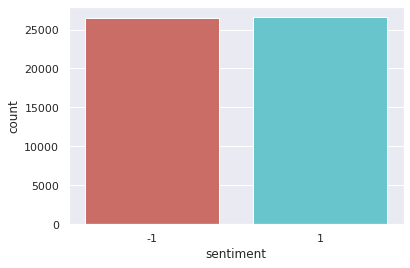

In [8]:
sns.countplot(x='sentiment', data=data, palette='hls')
plt.show()

#### Remove punctuation

In [0]:
def remove_punctuation(text):
    import string
    return str(text).translate(str.maketrans('', '', string.punctuation))

In [10]:
data['review_clean'] = data['review'].apply(remove_punctuation)
data[['review', 'review_clean']].head(10)

,review,review_clean
0,All of my kids have cried non-stop when I trie...,All of my kids have cried nonstop when I tried...
1,We wanted to get something to keep track of ou...,We wanted to get something to keep track of ou...
2,My daughter had her 1st baby over a year ago. ...,My daughter had her 1st baby over a year ago S...
3,"One of baby's first and favorite books, and it...",One of babys first and favorite books and it i...
4,Very cute interactive book! My son loves this ...,Very cute interactive book My son loves this b...
5,"Beautiful book, I love it to record cherished ...",Beautiful book I love it to record cherished t...
6,"Try this out for a spring project !Easy ,fun a...",Try this out for a spring project Easy fun and...
7,very nice Divine Mercy Pendant of Jesus now on...,very nice Divine Mercy Pendant of Jesus now on...
8,We bought the pins as my 6 year old Autistic s...,We bought the pins as my 6 year old Autistic s...
9,It has been many years since we needed diaper ...,It has been many years since we needed diaper ...


#### Compute word counts *(only for important_words)*

In [0]:
import json
with open('important_words.json', 'r') as f:
    important_words = json.load(f)

In [12]:
print(sorted(important_words))

['able', 'actually', 'almost', 'also', 'amazon', 'another', 'anything', 'around', 'away', 'babies', 'baby', 'back', 'bad', 'bag', 'best', 'better', 'big', 'bit', 'bottle', 'bottles', 'bottom', 'bought', 'box', 'broke', 'buy', 'buying', 'came', 'car', 'chair', 'cheap', 'child', 'clean', 'come', 'comfortable', 'company', 'completely', 'could', 'cover', 'crib', 'cup', 'cute', 'daughter', 'day', 'design', 'diaper', 'different', 'difficult', 'disappointed', 'easily', 'easy', 'either', 'enough', 'even', 'every', 'find', 'first', 'fit', 'fits', 'found', 'gate', 'get', 'getting', 'give', 'go', 'going', 'good', 'got', 'great', 'happy', 'hard', 'head', 'high', 'hold', 'however', 'idea', 'instead', 'item', 'keep', 'kids', 'know', 'last', 'less', 'like', 'little', 'long', 'look', 'looking', 'looks', 'lot', 'love', 'loves', 'made', 'make', 'makes', 'many', 'maybe', 'milk', 'money', 'monitor', 'month', 'months', 'much', 'need', 'never', 'new', 'nice', 'night', 'old', 'one', 'open', 'ordered', 'part'

In [0]:
for word in important_words:
    data[word] = data['review_clean'].apply(lambda s : s.split().count(word))

In [14]:
data.head(10).iloc[:,5:]

,baby,one,great,love,use,would,like,easy,little,seat,old,well,get,also,really,son,time,bought,product,good,daughter,much,loves,stroller,put,months,car,still,back,used,recommend,first,even,perfect,nice,bag,two,using,got,fit,...,looks,second,piece,box,pretty,trying,difficult,together,though,give,started,anything,last,company,come,returned,maybe,took,broke,makes,stay,instead,idea,head,said,less,went,working,high,unit,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
data.describe()

,rating,sentiment,baby,one,great,love,use,would,like,easy,little,seat,old,well,get,also,really,son,time,bought,product,good,daughter,much,loves,stroller,put,months,car,still,back,used,recommend,first,even,perfect,nice,bag,two,using,...,looks,second,piece,box,pretty,trying,difficult,together,though,give,started,anything,last,company,come,returned,maybe,took,broke,makes,stay,instead,idea,head,said,less,went,working,high,unit,seems,picture,completely,wish,buying,babies,won,tub,almost,either
count,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,...,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000,53072.000000
mean,3.097490,0.001620,0.352634,0.387003,0.219004,0.139603,0.278866,0.343345,0.264697,0.147837,0.184033,0.224035,0.186859,0.164362,0.244366,0.136701,0.175441,0.150399,0.190590,0.170636,0.217648,0.138359,0.121929,0.156354,0.078271,0.126074,0.148308,0.141657,0.111509,0.117312,0.160179,0.127902,0.103444,0.129993,0.149683,0.060427,0.077329,0.104594,0.113374,0.104179,...,0.049047,0.040643,0.035819,0.034990,0.050592,0.036479,0.035744,0.044524,0.050780,0.043620,0.040831,0.038099,0.039211,0.028904,0.044543,0.025041,0.020896,0.041039,0.027058,0.049763,0.033483,0.032654,0.030864,0.041924,0.036987,0.037477,0.036102,0.029036,0.041642,0.027774,0.045410,0.031203,0.029206,0.042037,0.035857,0.038212,0.000490,0.033690,0.039852,0.029846
std,1.730509,1.000008,0.853823,0.805433,0.507811,0.448906,0.622370,0.726663,0.613662,0.438918,0.497465,1.024416,0.474519,0.442365,0.592578,0.428076,0.496591,0.475344,0.507693,0.427581,0.575792,0.405884,0.409374,0.439444,0.299197,0.810088,0.450017,0.437950,0.588466,0.382721,0.510398,0.400058,0.315183,0.400019,0.432580,0.259913,0.305855,0.628121,0.399044,0.357136,...,0.238600,0.224774,0.225927,0.230187,0.243053,0.204773,0.211197,0.250333,0.241458,0.218599,0.221276,0.208041,0.213690,0.206527,0.222557,0.164019,0.152351,0.216459,0.186763,0.235270,0.193032,0.186827,0.182079,0.271213,0.212318,0.211699,0.209389,0.195686,0.251542,0.291096,0.231434,0.211248,0.180169,0.211466,0.194164,0.226992,0.022128,0.333135,0.211711,0.180691
min,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

## Logistic Regression Model

Matrix calculations.

In [0]:
def get_numpy_data(data, features, label):
    data['constant'] = 1
    features = ['constant'] + features
 
    features_df = data[features]     
    feature_matrix = features_df.to_numpy() #Convert into a numpy matrix
    
    label_array = data[label]
    label_array = label_array.to_numpy() #Convert into a numpy array

    return (feature_matrix, label_array)

In [0]:
feature_matrix, sentiment = get_numpy_data(data, important_words, 'sentiment')

In [18]:
feature_matrix.shape

(53072, 194)

#### Predict Probability

$ P(y_i = +1 | \mathbf{x}_i,\mathbf{w}) = \frac{1}{1 + \exp(-Score(\mathbf{x}_i))} = \frac{1}{1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))} $

In [0]:
def predict_probability(feature_matrix, coefficients): 
    score = feature_matrix.dot(coefficients)
    predictions = 1 / (1 + np.exp(-score))
    return predictions

#### Compute (log-)likelihood

$ \ell\ell(\mathbf{w}) = \sum_{i=1}^N \Big( (\mathbf{1}[y_i = +1] - 1)\mathbf{w}^T h(\mathbf{x}_i) - \ln\left(1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))\right) \Big) $

$ \ell\ell(\mathbf{w}) = \sum_{i=1}^N \Big( (Indicator funtion - 1)Score(\mathbf{x}_i) - \ln(1 + \exp(-Score(\mathbf{x}_i)) \Big) $

In [0]:
def compute_log_likelihood(feature_matrix, sentiment, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    indicator_function = (sentiment==+1)
    
    ll = np.sum((indicator_function-1)*scores - np.log(1. + np.exp(-scores)))
    return ll

#### Gradient Ascent

$ w^{(t+1)} = w^{(t)} + \eta \frac{d\ell}{dw} |_{w^{(t)}} $

or

$ \mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} + \eta \nabla  \ell(\mathbf{w}^{(t)}) $

Where, $  \frac{d \ell(\mathbf{w})}{d\mathbf{w}_j} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right) = \sum feature * (indicator - predictions) = \sum feature * error $

In [0]:
def logistic_regression(feature_matrix, sentiment, initial_coefficients, step_size, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):
        predictions = predict_probability(feature_matrix, coefficients)
        indicator = (sentiment==+1)
        errors = indicator - predictions

        for j in range(len(coefficients)): # loop over each coefficient        
            derivative = sum(feature_matrix[:,j] * errors)
            coefficients[j] = coefficients[j] + (step_size * derivative)
        
        #to limit the no. of lines
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            ll = compute_log_likelihood(feature_matrix, sentiment, coefficients)
            print(f"Iteration {itr}: Log-Likelihood = {ll}")
            
    return coefficients

### Fitting the Model

In [22]:
coefficients = logistic_regression(feature_matrix, sentiment, initial_coefficients=np.zeros(feature_matrix.shape[1]),
                                   step_size=1e-7, max_iter=301)

Iteration 0: Log-Likelihood = -36780.91768478126
Iteration 1: Log-Likelihood = -36775.1343471232
Iteration 2: Log-Likelihood = -36769.3571356369
Iteration 3: Log-Likelihood = -36763.5860323965
Iteration 4: Log-Likelihood = -36757.82101961526
Iteration 5: Log-Likelihood = -36752.06207964397
Iteration 6: Log-Likelihood = -36746.30919496959
Iteration 7: Log-Likelihood = -36740.562348213745
Iteration 8: Log-Likelihood = -36734.82152213134
Iteration 9: Log-Likelihood = -36729.08669960911
Iteration 10: Log-Likelihood = -36723.357863664314
Iteration 11: Log-Likelihood = -36717.634997443216
Iteration 12: Log-Likelihood = -36711.91808421987
Iteration 13: Log-Likelihood = -36706.20710739464
Iteration 14: Log-Likelihood = -36700.502050493
Iteration 15: Log-Likelihood = -36694.8028971641
Iteration 20: Log-Likelihood = -36666.39512032845
Iteration 30: Log-Likelihood = -36610.01327118031
Iteration 40: Log-Likelihood = -36554.19728365376
Iteration 50: Log-Likelihood = -36498.93316099373
Iteration 60:

We see Log-Likelihood is Increasing!

In [0]:
# Computing predicted scores
scores = np.dot(feature_matrix, coefficients)

### Making predictions

$
\hat{y}_i = 
\left\{
\begin{array}{ll}
      +1 & \mathbf{x}_i^T\mathbf{w} \gt 0 \\
      -1 & \mathbf{x}_i^T\mathbf{w} \leq 0 \\
\end{array} 
\right.
$

In [0]:
def class_predictions(score):
    if score > 0:
        return 1
    else:
        return -1

predictions_func = np.vectorize(class_predictions)
predictions = predictions_func(scores)
# print(predictions)

In [25]:
print("Positive Predictions:", predictions[predictions == 1].sum())
print("Negative Predictions:", predictions[predictions == -1].sum()*-1)

Positive Predictions: 25126
Negative Predictions: 27946


### Evaluating the Model

In [26]:
num_correct =  (sentiment == predictions).sum()
accuracy = (num_correct) / len(data)

print('Reviews   correctly classified =', num_correct)
print('Reviews incorrectly classified =', len(data) - num_correct)
print('Reviews total                  =', len(data))
print('---------------------------------------')
print('Accuracy:',   accuracy)
print('   Error:', 1-accuracy)

Reviews   correctly classified = 39903
Reviews incorrectly classified = 13169
Reviews total                  = 53072
---------------------------------------
Accuracy: 0.7518653904130238
   Error: 0.2481346095869762


In [27]:
print("Intercept:", coefficients[0])
coef_df = pd.DataFrame(zip(important_words, coefficients[1:]), columns=("Words", "Coefficients"))
coef_df.sort_values('Coefficients').set_index('Words')

Intercept: 0.005162201572858296


,Coefficients
Words,
would,-0.053860
product,-0.041511
money,-0.038982
work,-0.033070
even,-0.030051
...,...
loves,0.044976
little,0.045436
easy,0.064795


## Logistic Regression with L2 Regularization

In [0]:
import json
with open('train-idx.json', 'r') as f:
    train_idx = json.load(f)
with open('validation-idx.json', 'r') as f:
    validation_idx = json.load(f)

In [0]:
train_data = data.iloc[train_idx]
validation_data = data.iloc[validation_idx]

In [30]:
len(validation_data), len(train_data)

(10711, 42361)

In [0]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment')

### L2 penalty

#### Compute (log-)likelihood with L2 penality

$\ell\ell(\mathbf{w}) = \sum_{i=1}^N \Big( (\mathbf{1}[y_i = +1] - 1)\mathbf{w}^T h(\mathbf{x}_i) - \ln\left(1 + \exp(-\mathbf{w}^T h(\mathbf{x}_i))\right) \Big) \color{red}{-\lambda\|\mathbf{w}\|_2^2} $

$ \ell\ell(\mathbf{w}) = \sum_{i=1}^N \Big( (Indicator funtion - 1)Score(\mathbf{x}_i) - \ln(1 + \exp(-Score(\mathbf{x}_i)) \Big) \color{red}{-\lambda\|\mathbf{w}\|_2^2}$

In [0]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator_function = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    ll = np.sum((indicator_function-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)    
    return ll

#### Gradient Ascent with L2 penality

The only change we make is:

$
\frac{\partial\ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i)\left(\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})\right) \color{red}{-2\lambda w_j }
$

$ = \sum feature * (indicator - predictions) \color{red}{-2\lambda w_j} = \sum (feature * error) \color{red}{-2\lambda w_j} $

We do not apply the L2 penalty ($
 \color{red}{-2\lambda w_j }
$) on the intercept. A large intercept does not necessarily indicate overfitting because the intercept is not associated with any particular feature.

In [0]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    derivative = sum(feature * errors)

    # add L2 penalty term for any feature that isn't the intercept
    if not feature_is_constant: 
        derivative = derivative - (2 * l2_penalty * coefficient)
        
    return derivative

In [0]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):        
        predictions = predict_probability(feature_matrix, coefficients)
        indicator = (sentiment==+1)
        errors = indicator - predictions
        
        for j in range(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], coefficients[j], l2_penalty, is_intercept)
            coefficients[j] = coefficients[j] + (step_size * derivative)
        
        #to limit the no. of lines
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            ll =  compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print(f"Iteration {itr}: Log-Likelihood = {ll}")

    return coefficients

### Fitting the Model

We try with multiple L2 penalty

In [35]:
# With L2 = 0, i.e without penalty
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                     initial_coefficients=np.zeros(194),
                                                     step_size=5e-6, l2_penalty=0, max_iter=501)

Iteration 0: Log-Likelihood = -29179.39138302689
Iteration 1: Log-Likelihood = -29003.712590466093
Iteration 2: Log-Likelihood = -28834.661872878623
Iteration 3: Log-Likelihood = -28671.707815069705
Iteration 4: Log-Likelihood = -28514.430781982304
Iteration 5: Log-Likelihood = -28362.48344664838
Iteration 6: Log-Likelihood = -28215.567131220505
Iteration 7: Log-Likelihood = -28073.41743783136
Iteration 8: Log-Likelihood = -27935.795363960744
Iteration 9: Log-Likelihood = -27802.48168669038
Iteration 10: Log-Likelihood = -27673.273314842878
Iteration 11: Log-Likelihood = -27547.980836558698
Iteration 12: Log-Likelihood = -27426.426799766796
Iteration 13: Log-Likelihood = -27308.444447278995
Iteration 14: Log-Likelihood = -27193.876738760107
Iteration 15: Log-Likelihood = -27082.575558309214
Iteration 20: Log-Likelihood = -26570.430599383417
Iteration 30: Log-Likelihood = -25725.487423891307
Iteration 40: Log-Likelihood = -25055.533269103304
Iteration 50: Log-Likelihood = -24509.6359002

In [36]:
# With L2 = 4
coefficients_4_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=4, max_iter=501)

Iteration 0: Log-Likelihood = -29179.395081753617
Iteration 1: Log-Likelihood = -29003.73417180492
Iteration 2: Log-Likelihood = -28834.714418581865
Iteration 3: Log-Likelihood = -28671.803450678704
Iteration 4: Log-Likelihood = -28514.580779565153
Iteration 5: Log-Likelihood = -28362.698303173485
Iteration 6: Log-Likelihood = -28215.856632589206
Iteration 7: Log-Likelihood = -28073.790713931412
Iteration 8: Log-Likelihood = -27936.260937616433
Iteration 9: Log-Likelihood = -27803.04751805441
Iteration 10: Log-Likelihood = -27673.946842074038
Iteration 11: Log-Likelihood = -27548.769013273926
Iteration 12: Log-Likelihood = -27427.336129584306
Iteration 13: Log-Likelihood = -27309.481015690344
Iteration 14: Log-Likelihood = -27195.046242533623
Iteration 15: Log-Likelihood = -27083.883332610094
Iteration 20: Log-Likelihood = -26572.498743920918
Iteration 30: Log-Likelihood = -25729.32604153253
Iteration 40: Log-Likelihood = -25061.342458006082
Iteration 50: Log-Likelihood = -24517.520919

In [37]:
# With L2 = 10
coefficients_10_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=10, max_iter=501)

Iteration 0: Log-Likelihood = -29179.4006298437
Iteration 1: Log-Likelihood = -29003.766541629113
Iteration 2: Log-Likelihood = -28834.793226544734
Iteration 3: Log-Likelihood = -28671.94687528158
Iteration 4: Log-Likelihood = -28514.805715892686
Iteration 5: Log-Likelihood = -28363.02048078528
Iteration 6: Log-Likelihood = -28216.290711863126
Iteration 7: Log-Likelihood = -28074.35036890762
Iteration 8: Log-Likelihood = -27936.95892965964
Iteration 9: Log-Likelihood = -27803.895762654603
Iteration 10: Log-Likelihood = -27674.95647005435
Iteration 11: Log-Likelihood = -27549.95042714027
Iteration 12: Log-Likelihood = -27428.699055494057
Iteration 13: Log-Likelihood = -27311.034551398705
Iteration 14: Log-Likelihood = -27196.79890162302
Iteration 15: Log-Likelihood = -27085.843085282024
Iteration 20: Log-Likelihood = -26575.5969750566
Iteration 30: Log-Likelihood = -25735.073046084293
Iteration 40: Log-Likelihood = -25070.03447305897
Iteration 50: Log-Likelihood = -24529.31188025413
Ite

In [38]:
# With L2 = 1e2
coefficients_1e2_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                       initial_coefficients=np.zeros(194),
                                                       step_size=5e-6, l2_penalty=1e2, max_iter=501)

Iteration 0: Log-Likelihood = -29179.483851195015
Iteration 1: Log-Likelihood = -29004.25177456867
Iteration 2: Log-Likelihood = -28835.973821901112
Iteration 3: Log-Likelihood = -28674.094100830727
Iteration 4: Log-Likelihood = -28518.17112931624
Iteration 5: Log-Likelihood = -28367.83774653677
Iteration 6: Log-Likelihood = -28222.777089394982
Iteration 7: Log-Likelihood = -28082.70799391817
Iteration 8: Log-Likelihood = -27947.3759536754
Iteration 9: Log-Likelihood = -27816.547386152713
Iteration 10: Log-Likelihood = -27690.005888496114
Iteration 11: Log-Likelihood = -27567.549701255328
Iteration 12: Log-Likelihood = -27448.989913268753
Iteration 13: Log-Likelihood = -27334.14912742369
Iteration 14: Log-Likelihood = -27222.860418630866
Iteration 15: Log-Likelihood = -27114.966482291587
Iteration 20: Log-Likelihood = -26621.50201299239
Iteration 30: Log-Likelihood = -25819.72803950465
Iteration 40: Log-Likelihood = -25197.34035500628
Iteration 50: Log-Likelihood = -24701.03698195158
I

In [39]:
# With L2 = 1e3
coefficients_1e3_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                       initial_coefficients=np.zeros(194),
                                                       step_size=5e-6, l2_penalty=1e3, max_iter=501)

Iteration 0: Log-Likelihood = -29180.31606470814
Iteration 1: Log-Likelihood = -29009.071761117153
Iteration 2: Log-Likelihood = -28847.62378912284
Iteration 3: Log-Likelihood = -28695.144393968003
Iteration 4: Log-Likelihood = -28550.950607434377
Iteration 5: Log-Likelihood = -28414.4577112854
Iteration 6: Log-Likelihood = -28285.151243752676
Iteration 7: Log-Likelihood = -28162.56976043934
Iteration 8: Log-Likelihood = -28046.293877443597
Iteration 9: Log-Likelihood = -27935.939028997054
Iteration 10: Log-Likelihood = -27831.15045501687
Iteration 11: Log-Likelihood = -27731.599552598025
Iteration 12: Log-Likelihood = -27636.98108219489
Iteration 13: Log-Likelihood = -27547.010926701918
Iteration 14: Log-Likelihood = -27461.42422294827
Iteration 15: Log-Likelihood = -27379.97375625301
Iteration 20: Log-Likelihood = -27027.182083171854
Iteration 30: Log-Likelihood = -26527.22737266983
Iteration 40: Log-Likelihood = -26206.590487651112
Iteration 50: Log-Likelihood = -25995.96903148361
I

In [40]:
# With L2 = 1e5
coefficients_1e5_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                       initial_coefficients=np.zeros(194),
                                                       step_size=5e-6, l2_penalty=1e5, max_iter=501)

Iteration 0: Log-Likelihood = -29271.85955115189
Iteration 1: Log-Likelihood = -29271.71006588519
Iteration 2: Log-Likelihood = -29271.65738832722
Iteration 3: Log-Likelihood = -29271.61189922826
Iteration 4: Log-Likelihood = -29271.57079974803
Iteration 5: Log-Likelihood = -29271.533585046815
Iteration 6: Log-Likelihood = -29271.499884403343
Iteration 7: Log-Likelihood = -29271.469365844292
Iteration 8: Log-Likelihood = -29271.441728903956
Iteration 9: Log-Likelihood = -29271.416701494072
Iteration 10: Log-Likelihood = -29271.394037217673
Iteration 11: Log-Likelihood = -29271.37351294304
Iteration 12: Log-Likelihood = -29271.354926606935
Iteration 13: Log-Likelihood = -29271.33809522536
Iteration 14: Log-Likelihood = -29271.322853092006
Iteration 15: Log-Likelihood = -29271.30905014689
Iteration 20: Log-Likelihood = -29271.257291497048
Iteration 30: Log-Likelihood = -29271.20657204836
Iteration 40: Log-Likelihood = -29271.18775997432
Iteration 50: Log-Likelihood = -29271.180782472904


#### Measuring Accuracy

In [0]:
def get_classification_accuracy(feature_matrix, sentiment, coefficients):
    scores = np.dot(feature_matrix, coefficients)
    
    #making predictions
    apply_threshold = np.vectorize(lambda x: 1. if x > 0  else -1.)
    predictions = apply_threshold(scores)
    
    num_correct = (predictions == sentiment).sum()
    accuracy = num_correct / len(feature_matrix)    
    return accuracy

In [0]:
train_accuracy = {}
train_accuracy[0]   = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_0_penalty)
train_accuracy[4]   = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_4_penalty)
train_accuracy[10]  = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_10_penalty)
train_accuracy[1e2] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e2_penalty)
train_accuracy[1e3] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e3_penalty)
train_accuracy[1e5] = get_classification_accuracy(feature_matrix_train, sentiment_train, coefficients_1e5_penalty)

validation_accuracy = {}
validation_accuracy[0]   = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_0_penalty)
validation_accuracy[4]   = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_4_penalty)
validation_accuracy[10]  = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_10_penalty)
validation_accuracy[1e2] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e2_penalty)
validation_accuracy[1e3] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e3_penalty)
validation_accuracy[1e5] = get_classification_accuracy(feature_matrix_valid, sentiment_valid, coefficients_1e5_penalty)

In [43]:
for key in sorted(validation_accuracy.keys()):
    print(f"L2 penalty = {key}")
    print(f"train accuracy = {train_accuracy[key]}, validation_accuracy = {validation_accuracy[key]}")
    print("--------------------------------------------------------------------------------")

L2 penalty = 0
train accuracy = 0.7851561577866434, validation_accuracy = 0.781439641490057
--------------------------------------------------------------------------------
L2 penalty = 4
train accuracy = 0.7851089445480512, validation_accuracy = 0.7815330034543927
--------------------------------------------------------------------------------
L2 penalty = 10
train accuracy = 0.7849909114515711, validation_accuracy = 0.7817197273830642
--------------------------------------------------------------------------------
L2 penalty = 100.0
train accuracy = 0.7839758268218409, validation_accuracy = 0.781066193632714
--------------------------------------------------------------------------------
L2 penalty = 1000.0
train accuracy = 0.7758551497839994, validation_accuracy = 0.7713565493417982
--------------------------------------------------------------------------------
L2 penalty = 100000.0
train accuracy = 0.6803663747314747, validation_accuracy = 0.667818130893474
-----------------------